**Extracting and analyzing pertinent data essential for a thorough evaluation from the standpoint of a venture capitalist firm**

In [ ]:
#Data cleaning
import pandas as pd
import numpy as np


In [ ]:
dfc= pd.read_excel('/content/Project Dataset1.xlsx',sheet_name='COMPANY')
dfc

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10
...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia","Sep 17, 2018",—,—,$1M to $10M,11-50
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States","Jun 1, 2009",—,—,$50M to $100M,251-500
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,—,—,Less than $1M,1-10
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",—,$10B+,10001+


In [ ]:
dfc.describe(include='all').T

,count,unique,top,freq
COMPANY_NAME,1000,1000,Twitter,1
CATEGORY,1000,977,"Biotechnology, Health Care, Medical, Pharmaceu...",5
LOCATION,1000,255,"San Francisco, California, United States",173
FOUNDED_ON,1000,428,2012,55
EXITED_ON,1000,269,—,678
CLOSED_ON,1000,6,—,995
REVENU_RANGE,1000,9,$1M to $10M,230
EMPLOYEE_NUMBER,1000,10,101-250,196


In [ ]:
# Replace all null values or values with "_" with NA
# Rename column names
dfc1=dfc.rename(columns={'EMPLOYEE_NUMBER':'EMPLOYEE_COUNT','REVENU_RANGE':'REVENUE_RANGE'})
dfc1.replace('—',np.nan)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENUE_RANGE,EMPLOYEE_COUNT
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",NaN,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,NaN,NaN,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,NaN,NaN,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",NaN,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,NaN,NaN,$1M to $10M,1-10
...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia","Sep 17, 2018",NaN,NaN,$1M to $10M,11-50
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States","Jun 1, 2009",NaN,NaN,$50M to $100M,251-500
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,NaN,NaN,Less than $1M,1-10
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",NaN,$10B+,10001+


In [ ]:
#Extract country from location
location=dfc1['LOCATION'].str.split(',')
dfc1['COUNTRY_F']=location.str[2]
dfc1.drop(columns=['LOCATION'], inplace=True)
dfc1

,COMPANY_NAME,CATEGORY,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENUE_RANGE,EMPLOYEE_COUNT,COUNTRY_F
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,United States
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...",Oct 2014,—,—,$100M to $500M,5001-10000,China
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",2016,—,—,$1M to $10M,51-100,United States
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,China
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...",2018,—,—,$1M to $10M,1-10,United States
...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Sep 17, 2018",—,—,$1M to $10M,11-50,Colombia
996,Airship,"Analytics, Information Technology, Messaging, ...","Jun 1, 2009",—,—,$50M to $100M,251-500,United States
997,Jupiter,"Delivery, Logistics",2019,—,—,Less than $1M,1-10,United States
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Jul 31, 1998","Jan 13, 1978",—,$10B+,10001+,United States


In [ ]:
#Changing Date format
import datetime
# df1c.replace('—',np.nan)
dfc1['FOUNDED_ON']=pd.to_datetime(dfc1['FOUNDED_ON'].astype(str), errors='coerce').dt.strftime("%Y-%m-%d")
dfc1['EXITED_ON']=pd.to_datetime(dfc1['EXITED_ON'].astype(str), errors='coerce').dt.strftime("%Y-%m-%d")
dfc1['CLOSED_ON']=pd.to_datetime(dfc1['CLOSED_ON'].astype(str), errors='coerce').dt.strftime("%Y-%m-%d")
# dfc1.fillna('Unknown/NA')
dfc1

,COMPANY_NAME,CATEGORY,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENUE_RANGE,EMPLOYEE_COUNT,COUNTRY_F
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",2006-03-21,2013-11-07,NaN,$1B to $10B,1001-5000,United States
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...",2014-10-01,NaN,NaN,$100M to $500M,5001-10000,China
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",2016-01-01,NaN,NaN,$1M to $10M,51-100,United States
3,Xiaomi,"Consumer Electronics, Internet, Mobile",2010-04-04,2018-07-09,NaN,$10B+,10001+,China
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...",2018-01-01,NaN,NaN,$1M to $10M,1-10,United States
...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...",2018-09-17,NaN,NaN,$1M to $10M,11-50,Colombia
996,Airship,"Analytics, Information Technology, Messaging, ...",2009-06-01,NaN,NaN,$50M to $100M,251-500,United States
997,Jupiter,"Delivery, Logistics",2019-01-01,NaN,NaN,Less than $1M,1-10,United States
998,Bank of America,"Asset Management, Banking, Finance, Financial ...",1998-07-31,1978-01-13,NaN,$10B+,10001+,United States


In [ ]:
dfc2=dfc1

In [ ]:
#Split Employee count range in max, min and upper limit
def splite(x):
    min_value = x.split('-')[0]
    max_value = x.split('-')[1] if '-' in x else x.replace('+', '').replace('Less than ', '')
    upper_limit = 'inf' if '+' in x or 'Less than' in x else None
    return min_value, max_value, upper_limit

dfc2[['MIN_EMPLOYEES', 'MAX_EMPLOYEES', 'UPPER_LIMIT_EMPLOYEES']] = pd.DataFrame(dfc2['EMPLOYEE_COUNT'].apply(splite).tolist())
dfc2[['MIN_EMPLOYEES', 'MAX_EMPLOYEES']] = dfc2[['MIN_EMPLOYEES', 'MAX_EMPLOYEES']].apply(pd.to_numeric, errors='coerce')
dfc2

,COMPANY_NAME,CATEGORY,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENUE_RANGE,EMPLOYEE_COUNT,COUNTRY_F,MIN_EMPLOYEES,MAX_EMPLOYEES,UPPER_LIMIT_EMPLOYEES
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",2006-03-21,2013-11-07,NaN,$1B to $10B,1001-5000,United States,1001.0,5000.0,None
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...",2014-10-01,NaN,NaN,$100M to $500M,5001-10000,China,5001.0,10000.0,None
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",2016-01-01,NaN,NaN,$1M to $10M,51-100,United States,51.0,100.0,None
3,Xiaomi,"Consumer Electronics, Internet, Mobile",2010-04-04,2018-07-09,NaN,$10B+,10001+,China,NaN,10001.0,inf
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...",2018-01-01,NaN,NaN,$1M to $10M,1-10,United States,1.0,10.0,None
...,...,...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...",2018-09-17,NaN,NaN,$1M to $10M,11-50,Colombia,11.0,50.0,None
996,Airship,"Analytics, Information Technology, Messaging, ...",2009-06-01,NaN,NaN,$50M to $100M,251-500,United States,251.0,500.0,None
997,Jupiter,"Delivery, Logistics",2019-01-01,NaN,NaN,Less than $1M,1-10,United States,1.0,10.0,None
998,Bank of America,"Asset Management, Banking, Finance, Financial ...",1998-07-31,1978-01-13,NaN,$10B+,10001+,United States,NaN,10001.0,inf


In [ ]:
#split the revenue range
# dfc2.replace('—',np.nan)
dfc3=dfc2
def splitr(x):
    min_value = x.split(' to ')[0].replace('$', '').replace('B', 'e9').replace('M', 'e6') if ' to ' in x else x.replace('+', '').replace('Less than ', '').replace('$', '').replace('B', 'e9').replace('M', 'e6')
    max_value = x.split(' to ')[1].replace('$', '').replace('B', 'e9').replace('M', 'e6') if ' to ' in x else x.replace('+', '').replace('Less than ', '').replace('$', '').replace('B', 'e9').replace('M', 'e6')
    upper_limit = 'inf' if '+' in x or 'Less than' in x else None
    return min_value, max_value, upper_limit

dfc3[['MIN_REV', 'MAX_REV', 'UPPER_LREV']] = pd.DataFrame(dfc3['REVENUE_RANGE'].apply(splitr).tolist())
dfc3[['MIN_REV', 'MAX_REV']] = dfc3[['MIN_REV', 'MAX_REV']].apply(pd.to_numeric, errors='coerce')
dfc3

,COMPANY_NAME,CATEGORY,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENUE_RANGE,EMPLOYEE_COUNT,COUNTRY_F,MIN_EMPLOYEES,MAX_EMPLOYEES,UPPER_LIMIT_EMPLOYEES,MIN_REV,MAX_REV,UPPER_LREV
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",2006-03-21,2013-11-07,NaN,$1B to $10B,1001-5000,United States,1001.0,5000.0,None,1.000000e+09,1.000000e+10,None
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...",2014-10-01,NaN,NaN,$100M to $500M,5001-10000,China,5001.0,10000.0,None,1.000000e+08,5.000000e+08,None
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",2016-01-01,NaN,NaN,$1M to $10M,51-100,United States,51.0,100.0,None,1.000000e+06,1.000000e+07,None
3,Xiaomi,"Consumer Electronics, Internet, Mobile",2010-04-04,2018-07-09,NaN,$10B+,10001+,China,NaN,10001.0,inf,1.000000e+10,1.000000e+10,inf
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...",2018-01-01,NaN,NaN,$1M to $10M,1-10,United States,1.0,10.0,None,1.000000e+06,1.000000e+07,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...",2018-09-17,NaN,NaN,$1M to $10M,11-50,Colombia,11.0,50.0,None,1.000000e+06,1.000000e+07,None
996,Airship,"Analytics, Information Technology, Messaging, ...",2009-06-01,NaN,NaN,$50M to $100M,251-500,United States,251.0,500.0,None,5.000000e+07,1.000000e+08,None
997,Jupiter,"Delivery, Logistics",2019-01-01,NaN,NaN,Less than $1M,1-10,United States,1.0,10.0,None,1.000000e+06,1.000000e+06,inf
998,Bank of America,"Asset Management, Banking, Finance, Financial ...",1998-07-31,1978-01-13,NaN,$10B+,10001+,United States,NaN,10001.0,inf,1.000000e+10,1.000000e+10,inf


**Q. What is the spread of Categories?**

In [ ]:
dfcat=dfc['CATEGORY']
dfcat1=dfcat.str.split(',')
dfcat1
Categories=dfcat1.explode('CATEGORY')
Categories

0                                   Blogging Platforms
1                                            Messaging
2                                                  SMS
3                                         Social Media
4                                              Banking
                             ...                      
4979    Application Specific Integrated Circuit (ASIC)
4980                                           Bitcoin
4981                                       Electronics
4982                                     Manufacturing
4983                                     Semiconductor
Name: CATEGORY, Length: 4984, dtype: object

In [ ]:
unique_categories_count = Categories.nunique()
print("Unique Number of Categories:", unique_categories_count)

Unique Number of Categories: 639


In [ ]:
Categoriesdf=pd.DataFrame(Categories)

In [ ]:
Categoriesdf

,CATEGORY
0,Blogging Platforms
1,Messaging
2,SMS
3,Social Media
4,Banking
...,...
4979,Application Specific Integrated Circuit (ASIC)
4980,Bitcoin
4981,Electronics
4982,Manufacturing


In [ ]:
top_categories = Categoriesdf.value_counts().head(10)
print("Top Categories:")
print(top_categories)
category_percentage = Categoriesdf.value_counts(normalize=True) * 100
print("\nPercentage of Companies in Each Category:")
print(category_percentage)

Top Categories:
CATEGORY               
 Software                  308
 SaaS                      149
 FinTech                   146
 Information Technology    136
 Financial Services        130
 Internet                  120
 Enterprise Software       107
 Mobile                     84
 Finance                    69
Analytics                   67
dtype: int64

Percentage of Companies in Each Category:
CATEGORY               
 Software                  6.179775
 SaaS                      2.989567
 FinTech                   2.929374
 Information Technology    2.728732
 Financial Services        2.608347
                             ...   
 Home and Garden           0.020064
 Real Estate Investment    0.020064
 Homeland Security         0.020064
 Communication Hardware    0.020064
 3D Technology             0.020064
Length: 639, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

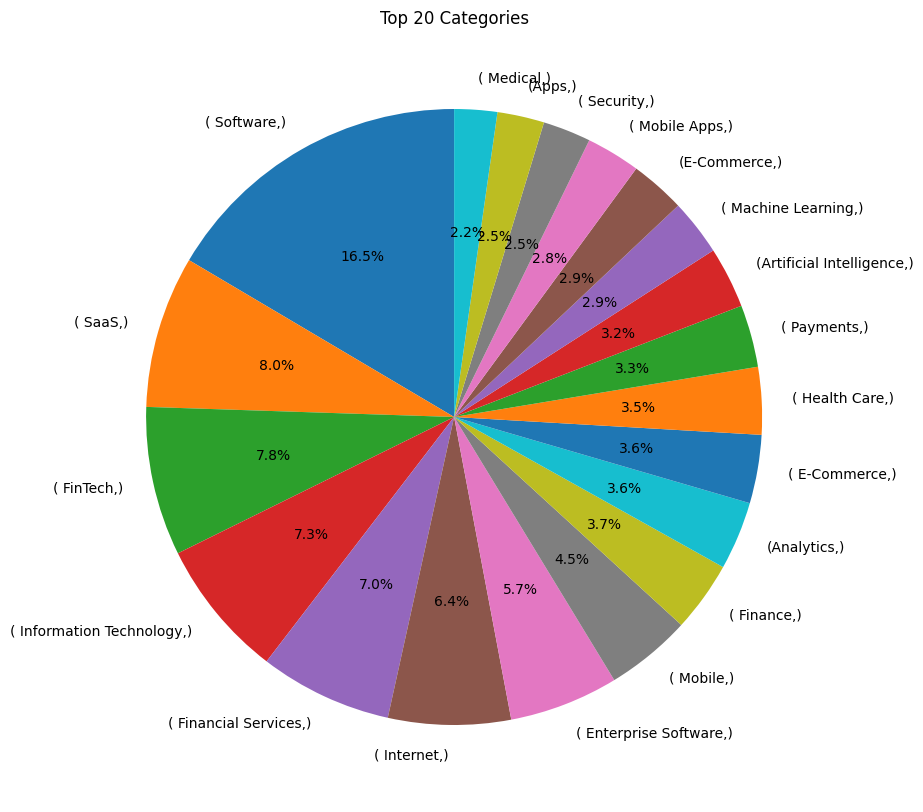

In [ ]:
top_categories = Categoriesdf.value_counts().head(20)

# Create a pie chart for the top 20 categories
plt.figure(figsize=(10, 10))
top_categories.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Top 20 Categories')
plt.show()

**Q.Which industry has the highest or lowest revenue?**

In [ ]:
dfc3['Avg_Revenue'] = (dfc3['MIN_REV'] + dfc3['MAX_REV']) / 2

In [ ]:
dfc3

,COMPANY_NAME,CATEGORY,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENUE_RANGE,EMPLOYEE_COUNT,COUNTRY_F,MIN_EMPLOYEES,MAX_EMPLOYEES,UPPER_LIMIT_EMPLOYEES,MIN_REV,MAX_REV,UPPER_LREV,Avg_Revenue
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",2006-03-21,2013-11-07,NaN,$1B to $10B,1001-5000,United States,1001.0,5000.0,None,1.000000e+09,1.000000e+10,None,5.500000e+09
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...",2014-10-01,NaN,NaN,$100M to $500M,5001-10000,China,5001.0,10000.0,None,1.000000e+08,5.000000e+08,None,3.000000e+08
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",2016-01-01,NaN,NaN,$1M to $10M,51-100,United States,51.0,100.0,None,1.000000e+06,1.000000e+07,None,5.500000e+06
3,Xiaomi,"Consumer Electronics, Internet, Mobile",2010-04-04,2018-07-09,NaN,$10B+,10001+,China,NaN,10001.0,inf,1.000000e+10,1.000000e+10,inf,1.000000e+10
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...",2018-01-01,NaN,NaN,$1M to $10M,1-10,United States,1.0,10.0,None,1.000000e+06,1.000000e+07,None,5.500000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...",2018-09-17,NaN,NaN,$1M to $10M,11-50,Colombia,11.0,50.0,None,1.000000e+06,1.000000e+07,None,5.500000e+06
996,Airship,"Analytics, Information Technology, Messaging, ...",2009-06-01,NaN,NaN,$50M to $100M,251-500,United States,251.0,500.0,None,5.000000e+07,1.000000e+08,None,7.500000e+07
997,Jupiter,"Delivery, Logistics",2019-01-01,NaN,NaN,Less than $1M,1-10,United States,1.0,10.0,None,1.000000e+06,1.000000e+06,inf,1.000000e+06
998,Bank of America,"Asset Management, Banking, Finance, Financial ...",1998-07-31,1978-01-13,NaN,$10B+,10001+,United States,NaN,10001.0,inf,1.000000e+10,1.000000e+10,inf,1.000000e+10


In [ ]:
# Group by Categories and calculate average revenue for each category
category_avg_revenue = dfc3.groupby('CATEGORY')['Avg_Revenue'].mean()
category_avg_revenue

CATEGORY
3D Printing, 3D Technology, Precious Metals, Robotics                                                                                  5.500000e+06
3D Technology, Aerospace, Artificial Intelligence, Manufacturing, Space Travel                                                         5.500000e+06
3D Technology, Architecture, Artificial Intelligence, CAD, Information Technology, Machine Learning, Property Development, Software    5.500000e+06
3D Technology, Artificial Intelligence, Augmented Reality, Computer Vision, Machine Learning, Virtual Reality                          5.500000e+06
3D Technology, Augmented Reality, Media and Entertainment, Mobile Apps, Social Media, Video, Video Streaming, Virtual Reality          3.000000e+07
                                                                                                                                           ...     
Social Media, Video, Video Games, Video Streaming                                                      

In [ ]:
highest_avg_revenue_industry = category_avg_revenue.idxmax()
lowest_avg_revenue_industry = category_avg_revenue.idxmin()

print("Industry with the Highest Average Revenue:", highest_avg_revenue_industry)
print("Industry with the Lowest Average Revenue:", lowest_avg_revenue_industry)

Industry with the Highest Average Revenue: Ad Network, Blogging Platforms, Collaboration, Email, Enterprise Software, Information Technology, Search Engine, Software, Video Streaming
Industry with the Lowest Average Revenue: Accounting, Credit Cards, Enterprise Software, Finance, Financial Services, FinTech


**Industry with the Highest Average Revenue: Ad Network, Blogging Platforms, Collaboration, Email, Enterprise Software, Information Technology, Search Engine, Software, Video Streaming**

**Industry with the Lowest Average Revenue: Accounting, Credit Cards, Enterprise Software, Finance, Financial Services, FinTech**

**Q. What are the industries with highest growth potential based on revenue and employee expansion?**

In [ ]:
#calculating this as a mean of product of mean revenue and employee
dfc3['Growth_Potential'] = dfc3['Avg_Revenue'] * ((dfc3['MIN_EMPLOYEES'] + dfc3['MAX_EMPLOYEES']) / 2)
#sum of growth potential for each category
category_growth_potential = dfc3.groupby('CATEGORY')['Growth_Potential'].sum()
# Identify the industries with the highest growth potential
high_growth_potential_industries = category_growth_potential.idxmax()
print("Industries with the Highest Growth Potential:", high_growth_potential_industries)

Industries with the Highest Growth Potential: 3D Technology, CAD, Enterprise Software, Information Technology, Product Design, Software


**Industries with the Highest Growth Potential are 3D Technology, CAD, Enterprise Software, Information Technology, Product Design, Software**

**Q. Identify the distribution of companies across the locations to identify regions with growing entreprenurial ecosystems**

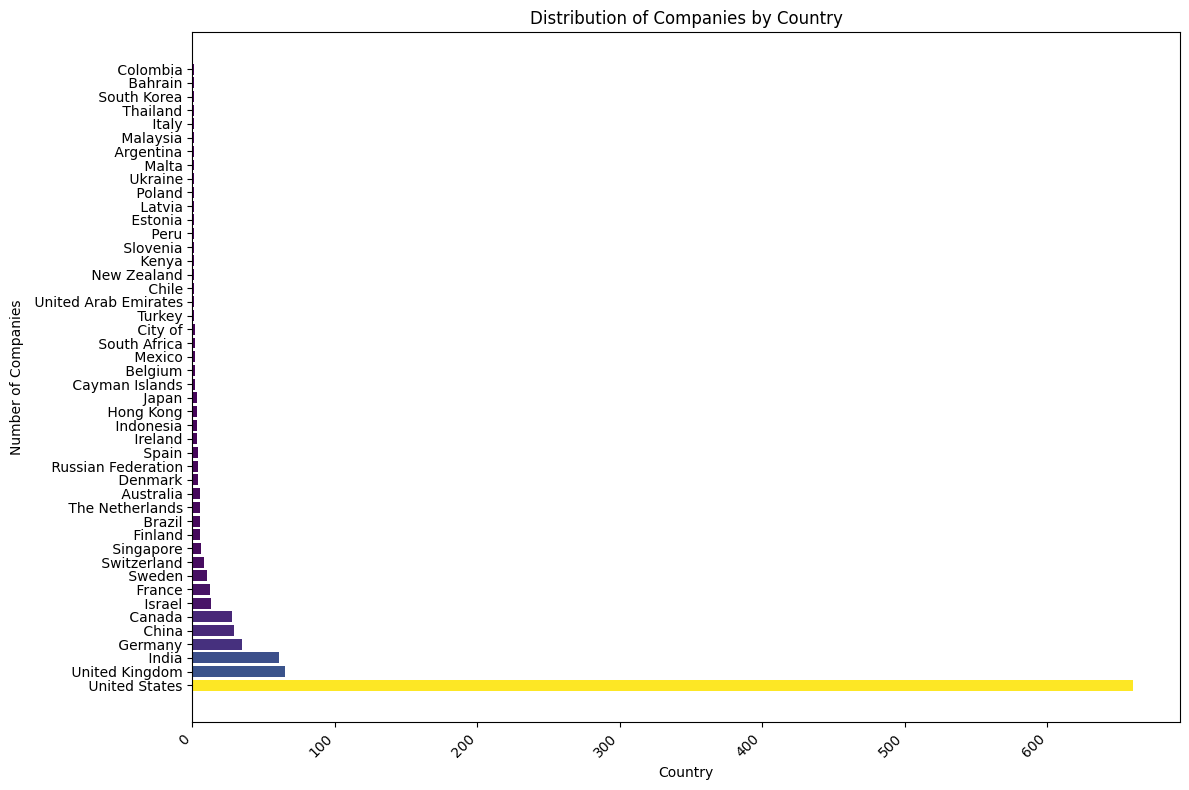

In [ ]:
import plotly.express as px

location_distribution = dfc3['COUNTRY_F'].value_counts().reset_index(name='Company_Count')
location_distribution
if location_distribution.isnull().values.any():
    print("Warning: There are missing values in the data.")

plt.figure(figsize=(12, 8))
plt.barh(location_distribution['index'], location_distribution['Company_Count'], color=plt.cm.viridis(location_distribution['Company_Count']))
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**United States, United Kingdom, and India are  leading in terms of growing entrepreneurial ecosystems.**

**Q. Are there any geographical patterns in the founding year?**

In [ ]:
import seaborn as sns

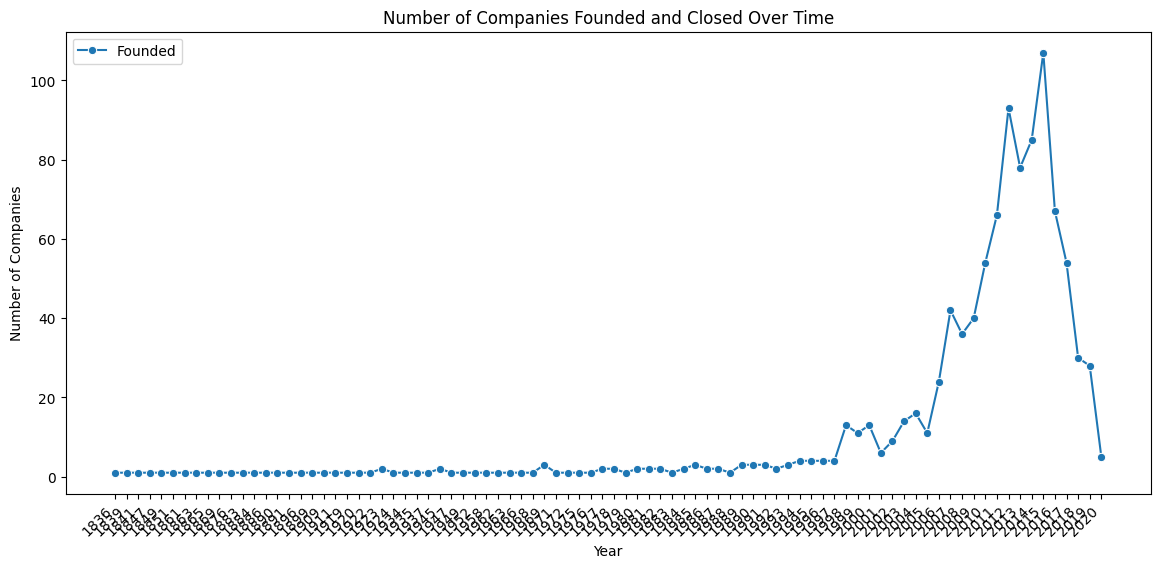

In [ ]:
dfc3['Founded_Year'] = pd.to_datetime(dfc3['FOUNDED_ON']).dt.strftime('%Y')


founded_counts = dfc3['Founded_Year'].value_counts().reset_index().sort_values('index')

# Plotting line plot
plt.figure(figsize=(14, 6))
sns.lineplot(x='index', y='Founded_Year', data=founded_counts, label='Founded', marker='o')
plt.title('Number of Companies Founded and Closed Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.show()

**The business landscape witnessed a surge in the number of companies post-1970s, experiencing exponential growth particularly in the early 2000s and reaching its zenith around 2014-2015. The widespread adoption of the internet in the 1990s and the subsequent dot-com boom provided a platform for the creation of online businesses, leading to a significant increase in startups and entrepreneurial activities. ** **bold text**

**Q. What is the correlation between the revenue and the number of employees?**

In [ ]:
dfc3['Avg_Employee_count'] = (dfc3['MIN_EMPLOYEES'] + dfc3['MIN_EMPLOYEES']) / 2
dfc3
correlation=dfc3['Avg_Employee_count'].corr(dfc3['Avg_Revenue']).mean()
correlation

0.3861237677381218

**A correlation coefficient of approximately 0.39 suggests a moderate positive correlation between the number of employees and revenue. While the variables may be correlated, it does not necessarily mean that one variable causes the other to change so while investing, take other variables in consideration.**

In [ ]:
dfi= pd.read_excel('/content/Project Dataset1.xlsx',sheet_name='INVESTMENT')
dfi

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed
...,...,...,...,...,...
5932,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",—
5933,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",—
5934,Wipro Technologies,Post-IPO Equity,—,"Oct 1, 2006",—
5935,Wipro Technologies,Post-IPO Equity,—,"Sep 1, 2007",—


In [ ]:
dfi1=dfi.replace('—',np.nan)
dfi1

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",NaN
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed
...,...,...,...,...,...
5932,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",NaN
5933,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",NaN
5934,Wipro Technologies,Post-IPO Equity,NaN,"Oct 1, 2006",NaN
5935,Wipro Technologies,Post-IPO Equity,NaN,"Sep 1, 2007",NaN


In [ ]:
#Date format
dfi1['Announced_Year'] = pd.to_datetime(dfi1['ANNOUNCED_DATE']).dt.strftime('%Y')
dfi1

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,Announced_Year
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",NaN,2021
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,2021
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed,2020
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed,2020
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed,2021
...,...,...,...,...,...,...
5932,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",NaN,2018
5933,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",NaN,2019
5934,Wipro Technologies,Post-IPO Equity,NaN,"Oct 1, 2006",NaN,2006
5935,Wipro Technologies,Post-IPO Equity,NaN,"Sep 1, 2007",NaN,2007


**Q. Are there any temporal patterns in the founding dates alongside the dates when investments were announced?**

In [ ]:
time_trends = pd.merge(dfc1[["COMPANY_NAME", "FOUNDED_ON"]], dfi1[["COMPANY_NAME", "ANNOUNCED_DATE"]], on="COMPANY_NAME")
grouped_data = time_trends.groupby('COMPANY_NAME').agg({'FOUNDED_ON': 'min', 'ANNOUNCED_DATE': 'max'}).reset_index()
grouped_data


,COMPANY_NAME,FOUNDED_ON,ANNOUNCED_DATE
0,1mg,2015-02-03,"May 31, 2016"
1,23andMe,2006-04-01,"Sep 5, 2017"
2,360VUZ,2017-01-01,"Jan 22, 2019"
3,4D Molecular Therapeutics,2013-01-01,"Sep 5, 2018"
4,908 Devices,2012-01-01,"May 6, 2015"
...,...,...,...
930,monday.com,2012-02-01,"May 21, 2020"
931,nCino,2012-01-01,"Oct 2, 2019"
932,project44,2014-01-01,"Sep 12, 2016"
933,tabby,2019-01-01,"Jun 8, 2020"


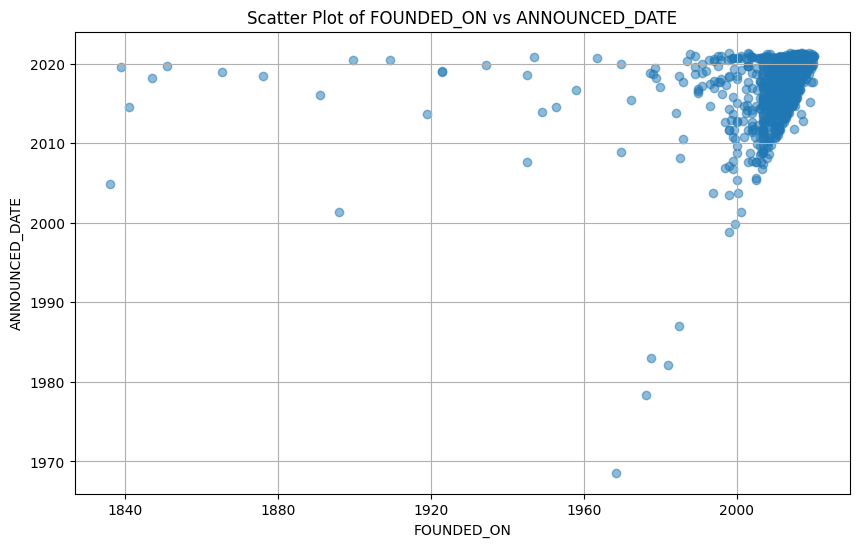

In [ ]:
grouped_data['FOUNDED_ON'] = pd.to_datetime(grouped_data['FOUNDED_ON'], errors='coerce')
grouped_data['ANNOUNCED_DATE'] = pd.to_datetime(grouped_data['ANNOUNCED_DATE'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['FOUNDED_ON'], grouped_data['ANNOUNCED_DATE'], alpha=0.5)
plt.title('Scatter Plot of FOUNDED_ON vs ANNOUNCED_DATE')
plt.xlabel('FOUNDED_ON')
plt.ylabel('ANNOUNCED_DATE')
plt.grid(True)
plt.show()

**Q. Are any patterns related to time lags between founding and investment announcements?**

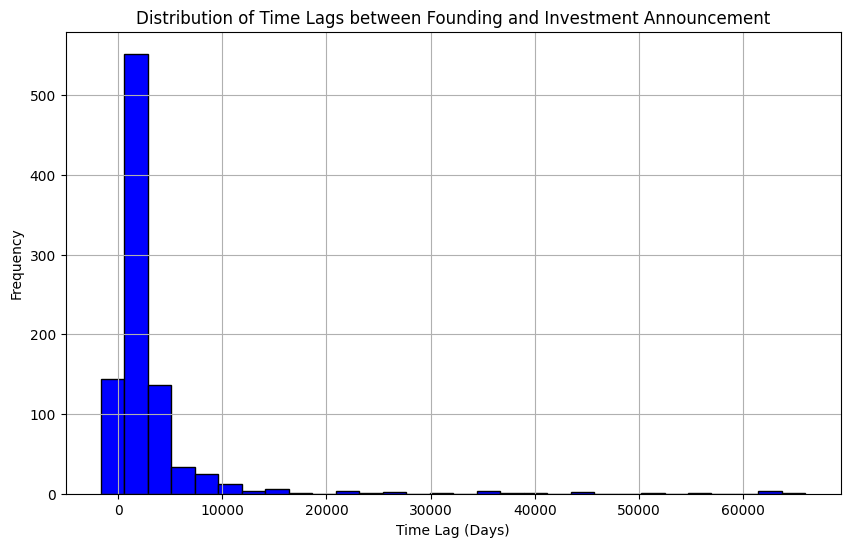

In [ ]:
grouped_data['Time_Lag'] = (grouped_data['ANNOUNCED_DATE'] - grouped_data['FOUNDED_ON']).dt.days

# Create a histogram to visualize the distribution of time lags
plt.figure(figsize=(10, 6))
plt.hist(grouped_data['Time_Lag'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Time Lags between Founding and Investment Announcement')
plt.xlabel('Time Lag (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Over the years, there has been an improvement in the efficiency of securing investments, reflected in shorter time lags.The right-skewed distribution in the histogram suggests that a significant portion of companies in our dataset tend to receive investments relatively soon after their founding. The concentration of shorter time lags is evident from the peak on the left side, indicating an efficient and quicker funding process for many companies..**

**Q. What are industries that have both high revenue ranges and significant funding amounts, indicating potentially successful sectors?**

In [ ]:
top_performing = pd.merge(dfc3[["COMPANY_NAME", "CATEGORY", "Avg_Revenue"]], dfi1, on="COMPANY_NAME")
top_performing

,COMPANY_NAME,CATEGORY,Avg_Revenue,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,Announced_Year
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",5.500000e+09,Private Equity,NaN,"Jan 5, 2020",Private Equity,2020
1,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",5.500000e+09,Venture - Series Unknown,NaN,"May 14, 2010",NaN,2010
2,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",5.500000e+09,Secondary Market,NaN,"Nov 1, 2012",NaN,2012
3,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",5.500000e+09,Seed,"$25,000","Jan 1, 2007",Seed,2007
4,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",5.500000e+09,Convertible Note,NaN,"Mar 1, 2021",NaN,2021
...,...,...,...,...,...,...,...,...
5932,Bitmain,Application Specific Integrated Circuit (ASIC)...,5.500000e+09,Series B,"$422,000,000","Aug 7, 2018",Early Stage Venture,2018
5933,Bitmain,Application Specific Integrated Circuit (ASIC)...,5.500000e+09,Series A,"$50,000,000","Sep 4, 2017",Early Stage Venture,2017
5934,Bitmain,Application Specific Integrated Circuit (ASIC)...,5.500000e+09,Series B,"$292,700,000","Jun 11, 2018",Early Stage Venture,2018
5935,Bitmain,Application Specific Integrated Circuit (ASIC)...,5.500000e+09,Series B,"$422,000,000","Aug 7, 2018",Early Stage Venture,2018


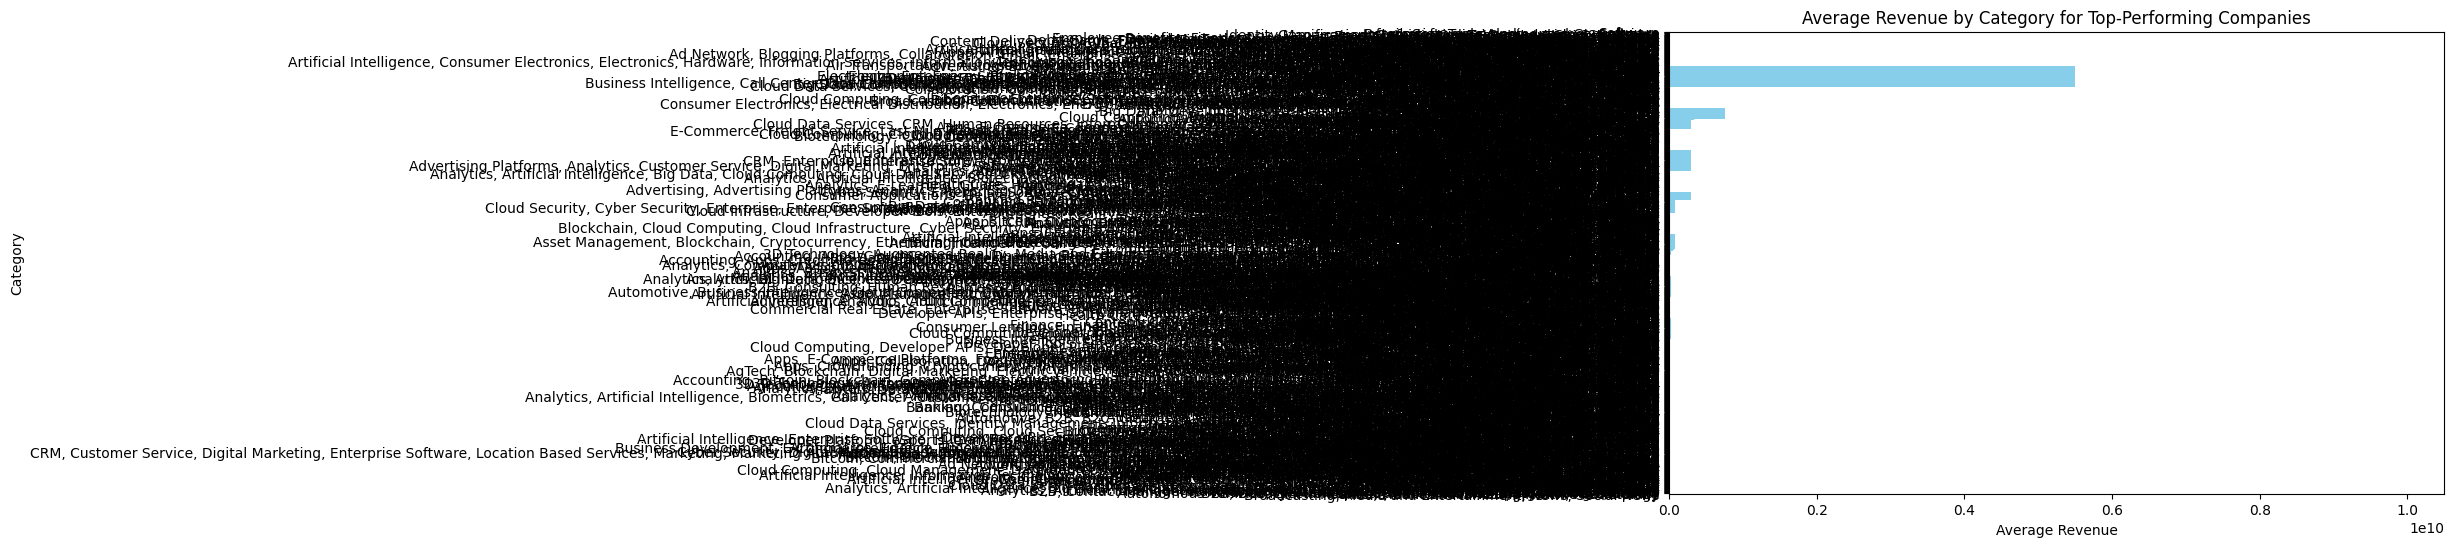

In [ ]:
plt.figure(figsize=(10, 6))
top_performing.groupby("CATEGORY")["Avg_Revenue"].mean().sort_values().plot(kind="barh", color="skyblue")
plt.title("Average Revenue by Category for Top-Performing Companies")
plt.xlabel("Average Revenue")
plt.ylabel("Category")
plt.show()
